In [1]:
import numpy as np
from numpy import pi
import math
import matplotlib.pyplot as plt
%matplotlib inline
from qiskit import Aer, execute, QuantumCircuit, IBMQ
from qiskit.visualization import plot_histogram

In [2]:
def qft_rotate_single(circuit, i):
    circuit.h(i)
    for qubit in reversed(range(0, i)):
        circuit.cp(pi/2**(i-qubit), qubit, i)

def qft(circuit, i):
    for i in reversed(range(n)):
        qft_rotate_single(circuit, i)
    for i in range(math.floor(n/2)):
        circuit.swap(i, n-(i+1))

回路準備

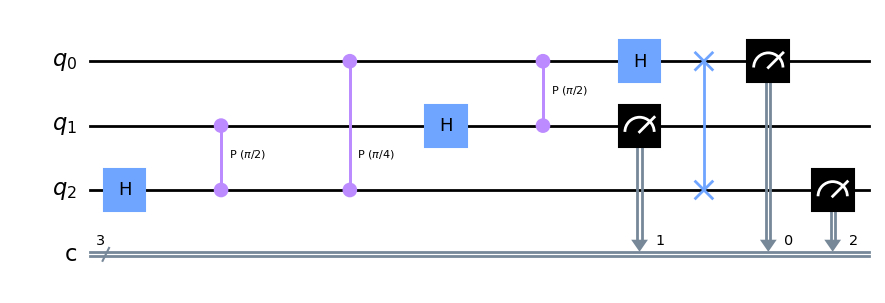

In [3]:
n = 3
qc = QuantumCircuit(n, n)

qft(qc, n)

for i in range(n):
    qc.measure(i, i)

qc.draw('mpl')

{'111': 1034, '101': 1079, '010': 1014, '001': 1024, '011': 978, '000': 984, '110': 1057, '100': 1022}


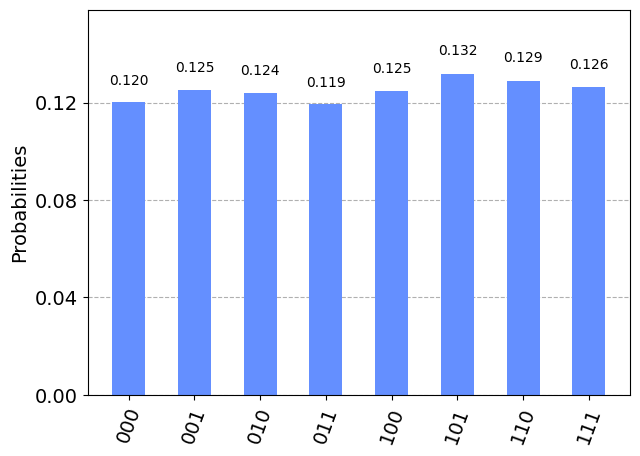

In [4]:
backend = Aer.get_backend('qasm_simulator')
shots = 8192
results = execute(qc, backend=backend, shots=shots).result()
answer = results.get_counts()

print(answer)
plot_histogram(answer)